# Sunrise Sunset Hypothesis

### Is there more accidents at the same time of day during periods of the year after which the sun has gone down compared to when it is still light?

## Packages
Importing all necessary packages to run the notebook

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Directory navigation and creation
Creating pathlib.Path objects for cross-platform navigation and loading the three datasets into pandas DataFrame objects

**Note:** here we import the cleaned accidents.pkl file

In [5]:
# creating Path object for current working directory
cwd = Path('./')
root = cwd.resolve().parent
# creating Path object for additional data directory
additional_data_dir = root / 'additional_data'
# create new directory for additional data
Path(additional_data_dir).mkdir(exist_ok=True)

# creating Path object for plots directroy
plots_dir = root / 'plots'
# create new directory for plots
Path(plots_dir).mkdir(exist_ok=True)

# defining the directory to original data
data_dir = root / 'data'
additional_directory = root / 'additional_data'

# list the .csv files for the project
for file in data_dir.glob('*.csv'):
    print(file)
    
# reading in .csv files to dataframes
vehicles = pd.read_csv(data_dir / 'vehicles2019.csv', dtype={'Accident_Index': str})
casualties = pd.read_csv(data_dir / 'casualties2019.csv', dtype={'Accident_Index': str})
# cleaned accidents DataFrame
accidents = pd.read_pickle(additional_data_dir / 'accidents_cleaned.pkl')

# convert column names to lowercase for ease of indexing
def lower_columns(df):
    """
    Defintion:
        convert column names to lower case
    """
    df.columns = map(str.lower, df.columns)
    
# converting all column names to lower case
lower_columns(vehicles)
lower_columns(casualties)

accidents.head(5)

/Volumes/GoogleDrive/My Drive/Dev/TrafficAccidents/data/accidents2019.csv
/Volumes/GoogleDrive/My Drive/Dev/TrafficAccidents/data/casualties2019.csv
/Volumes/GoogleDrive/My Drive/Dev/TrafficAccidents/data/vehicles2019.csv


,accident_index,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_(district),local_authority_(highway),...,lsoa_of_accident_location,district,converted_date,converted_time,sunrise,sunset,day_length,datetime,decimal_time,day_of_year
0,2019010128300,-0.153842,51.508057,1,3,2,3,2,1,E09000033,...,E01004762,westminster,2019-02-18,17:50:00,0 days 07:10:00,0 days 17:19:00,10:09:00,2019-02-18 17:50:00,17.833333,49
1,2019010164251,-0.141154,51.502191,1,3,1,2,2,1,E09000033,...,E01004736,westminster,2019-02-18,18:50:00,0 days 07:10:00,0 days 17:19:00,10:09:00,2019-02-18 18:50:00,18.833333,49
2,2019010164259,-0.174097,51.527663,1,3,2,1,2,1,E09000033,...,E01004728,westminster,2019-02-18,23:00:00,0 days 07:10:00,0 days 17:19:00,10:09:00,2019-02-18 23:00:00,23.000000,49
3,2019010164414,-0.163973,51.515931,1,3,2,1,2,1,E09000033,...,E01004658,westminster,2019-02-18,02:00:00,0 days 07:10:00,0 days 17:19:00,10:09:00,2019-02-18 02:00:00,2.000000,49
4,2019010164107,-0.103521,51.464277,1,3,1,1,2,9,E09000022,...,E01003051,lambeth,2019-02-18,08:00:00,0 days 07:10:00,0 days 17:19:00,10:09:00,2019-02-18 08:00:00,8.000000,49


## Plotting Sunrise

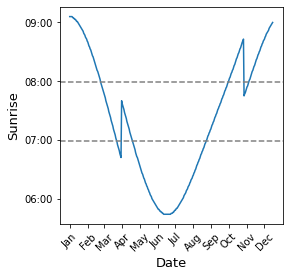

In [6]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_of_months = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

fig, ax = plt.subplots(figsize=(4, 4))
days = np.arange(1, 350)
sunrise = [accidents[(accidents['day_of_year'] == x)].sunrise for x in days]
sunrise = [time.iloc[0] for time in sunrise]
sunrise = [datetime.datetime.fromtimestamp(x.seconds) for x in sunrise]
ax.plot(days, sunrise)
ax.yaxis.set_major_locator(mdates.HourLocator())
ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel("Date", fontsize=13)
ax.set_xticks(day_of_months, months, rotation=45)
ax.set_ylabel("Sunrise", fontsize=13)

xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())

plt.axhline(y=0.333, color='grey', linestyle='--')
plt.axhline(y=0.291, color='grey', linestyle='--')
              
ax.figure.savefig(plots_dir / 'sunrise', bbox_inches='tight')

## Plotting Sunset

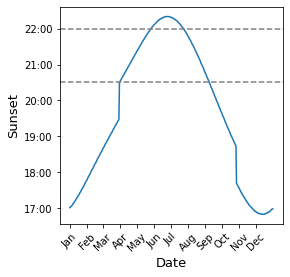

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))
days = np.arange(1, 366)
sunset = [accidents[(accidents['day_of_year'] == x)].sunset for x in days]
sunset = [time.iloc[0] for time in sunset]
sunset = [datetime.datetime.fromtimestamp(x.seconds) for x in sunset]

ax.set_xlabel("Date", fontsize=13)
ax.set_xticks(day_of_months, months, rotation=45)
ax.set_ylabel("Sunset", fontsize=13)


ax.plot(days, sunset)
ax.yaxis.set_major_locator(mdates.HourLocator())
ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.axhline(y=0.855, color='grey', linestyle='--')
plt.axhline(y=0.916, color='grey', linestyle='--')


ax.figure.savefig(plots_dir / 'sunset', bbox_inches='tight')

In [8]:
latest_day = accidents.loc[accidents.sunrise.argmin()]['day_of_year']
earliest_day = accidents.loc[accidents.sunrise.argmax()]['day_of_year']

## Separating the data

In [9]:
# isolate the time value from datetime (as datetime.time)
times = accidents.datetime.apply(lambda x: x.time())
# create new feature for this
accidents['time'] = times

In [10]:
### Sunrise
# interested from 7:00am to 8:00am

start_time = datetime.time(7, 0)
end_time = datetime.time(8, 0)

### Finding accidents across the entire year that occur between 7:00am and 8:00am

In [13]:
mask1 = accidents['time'] >= start_time
mask2 = accidents['time'] <= end_time
morning_accidents = accidents[mask1 & mask2]

In [14]:
morning_accidents.day_of_year.min()

1

### Determining the day at which 8:00am becomes light

In [15]:
sunrise_times = [time.time() for time in sunrise]
sunrise_times

half_1 = sunrise_times[:int(len(sunrise_times)/2)]
half_2 = sunrise_times[int(len(sunrise_times)/2):]

# day of sunrise at 8:00am (must +1 because days starts at 1)
sunrise7_1 = half_1.index(datetime.time(7, 0)) + 1
sunrise7_2 = half_2.index(datetime.time(7, 0)) + 1 + len(half_1)

sunrise8_1 = half_1.index(datetime.time(7, 59)) + 1
sunrise8_2 = half_2.index(datetime.time(7, 59)) + 1 + len(half_1)

print(sunrise7_1, sunrise7_2)

81 236


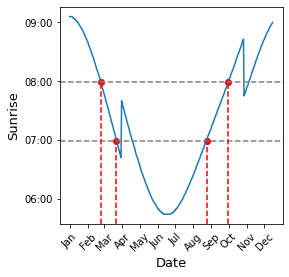

In [16]:
fig, ax = plt.subplots(figsize=(4, 4))
days = np.arange(1, 350)
sunrise = [accidents[(accidents['day_of_year'] == x)].sunrise for x in days]
sunrise = [time.iloc[0] for time in sunrise]
sunrise = [datetime.datetime.fromtimestamp(x.seconds) for x in sunrise]
ax.plot(days, sunrise)
ax.yaxis.set_major_locator(mdates.HourLocator())
ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel("Date", fontsize=13)
ax.set_xticks(day_of_months, months, rotation=45)
ax.set_ylabel("Sunrise", fontsize=13)

xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())

yvals = [0.333, 0.291]

plt.axhline(y=yvals[0], color='grey', linestyle='--')
plt.axhline(y=yvals[1], color='grey', linestyle='--')

plt.axvline(x=sunrise8_1, ymax=1-yvals[0], color='red', linestyle='--')
plt.axvline(x=sunrise8_2, ymax=1-yvals[0], color='red', linestyle='--')

plt.axvline(x=sunrise7_1, ymax=yvals[0]+.05, color='red', linestyle='--')
plt.axvline(x=sunrise7_2, ymax=yvals[0]+.05, color='red', linestyle='--')

plt.scatter(sunrise8_1, yvals[0], color='r')
plt.scatter(sunrise8_2, yvals[0], color='r')


plt.scatter(sunrise7_1, yvals[1], color='r')
plt.scatter(sunrise7_2, yvals[1], color='r')

              
ax.figure.savefig(plots_dir / 'sunrise_with_lines', bbox_inches='tight')

## Sunset

In [17]:
#sunset

start_time = datetime.time(20, 30)
end_time = datetime.time(21, 30)

In [18]:
mask1 = accidents['time'] >= start_time
mask2 = accidents['time'] <= end_time
evening_accidents = accidents[mask1 & mask2]

In [19]:
evening_accidents.shape

(4391, 38)

In [20]:
sunset_times = [time.time() for time in sunset]
sunset_times

half_1 = sunset_times[:int(len(sunset_times)/2)]
half_2 = sunset_times[int(len(sunset_times)/2):]

# day of sunset at 8:00am (must +1 because days starts at 1)
sunset830_1 = half_1.index(datetime.time(20, 30)) + 1
sunset830_2 = half_2.index(datetime.time(20, 30)) + 1 + len(half_1)

sunset2130_1 = half_1.index(datetime.time(21, 30)) + 1
sunset2130_2 = half_2.index(datetime.time(21, 30)) + 1 + len(half_1)

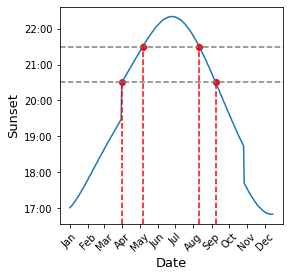

In [21]:
fig, ax = plt.subplots(figsize=(4, 4))
days = np.arange(1, 350)
sunset = [accidents[(accidents['day_of_year'] == x)].sunset for x in days]
sunset = [time.iloc[0] for time in sunset]
sunset = [datetime.datetime.fromtimestamp(x.seconds) for x in sunset]
ax.plot(days, sunset)
ax.yaxis.set_major_locator(mdates.HourLocator())
ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlabel("Date", fontsize=13)
ax.set_xticks(day_of_months, months, rotation=45)
ax.set_ylabel("Sunset", fontsize=13)

xlim=np.array(plt.gca().get_xlim())
ylim=np.array(plt.gca().get_ylim())

yvals = [0.855, 0.895]

plt.axhline(y=yvals[0], color='grey', linestyle='--')
plt.axhline(y=yvals[1], color='grey', linestyle='--')

plt.axvline(x=sunset830_1, ymax=yvals[0]-.2, color='red', linestyle='--')
plt.axvline(x=sunset830_2, ymax=yvals[0]-.2, color='red', linestyle='--')

plt.axvline(x=sunset2130_1, ymax=yvals[0]-.02, color='red', linestyle='--')
plt.axvline(x=sunset2130_2, ymax=yvals[0]-.02, color='red', linestyle='--')

plt.scatter(sunset830_1, yvals[0], color='r')
plt.scatter(sunset830_2, yvals[0], color='r')


plt.scatter(sunset2130_1, yvals[1], color='r')
plt.scatter(sunset2130_2, yvals[1], color='r')

              
ax.figure.savefig(plots_dir / 'sunset_with_lines', bbox_inches='tight')

## Analysis

### Sunrise

In [23]:
# the days at which the intersections exist on the plot
sunrise_dates = [sunrise8_1, sunrise7_1, sunrise7_2, sunrise8_2]

daylight_mask1 = morning_accidents['day_of_year'] > sunrise7_1
daylight_mask2 = morning_accidents['day_of_year'] < sunrise7_2
daylight_accidents = morning_accidents[daylight_mask1 & daylight_mask2]

darkness_mask1 = morning_accidents['day_of_year'] < sunrise8_1
darkness_mask2 = morning_accidents['day_of_year'] > sunrise8_2
darkness_accidents = morning_accidents[darkness_mask1 | darkness_mask2]

num_daylight = daylight_accidents.shape[0]
num_darkness = darkness_accidents.shape[0]

daylight_duration = sunrise7_2 - sunrise7_1
darkness_duration = sunrise8_1 + (365 - sunrise8_2)

print(f"Total accidents: {num_daylight + num_darkness}")

print(f"Number of accidents in daylight: {num_daylight}")
print(f"Duration of daylight: {daylight_duration} days")
print(f"\nNumber of accidents in darkness: {num_darkness}")
print(f"Duration of darkness: {darkness_duration} days")

avg_daylight = num_daylight / daylight_duration
avg_darkness = num_darkness / darkness_duration

print(f"\nAverage number of accidents per day in daylight: {avg_daylight:.2f}")
print(f"Average number of accidents per day in darkness: {avg_darkness:.2f}")

print(f"\nRatio: {avg_darkness / avg_daylight:.2f}")

Total accidents: 4938
Number of accidents in daylight: 2254
Duration of daylight: 155 days

Number of accidents in darkness: 2684
Duration of darkness: 146 days

Average number of accidents per day in daylight: 14.54
Average number of accidents per day in darkness: 18.38

Ratio: 1.26


### Sunset

In [26]:
# the days at which the intersections exist on the plot
sunset_dates = [sunset830_1, sunset2130_1, sunset2130_2, sunset830_2]

daylight_mask1 = evening_accidents['day_of_year'] > sunset2130_1
daylight_mask2 = evening_accidents['day_of_year'] < sunset2130_2
daylight_accidents = evening_accidents[daylight_mask1 & daylight_mask2]

darkness_mask1 = evening_accidents['day_of_year'] < sunset830_1
darkness_mask2 = evening_accidents['day_of_year'] > sunset830_2
darkness_accidents = evening_accidents[darkness_mask1 | darkness_mask2]

num_daylight = daylight_accidents.shape[0]
num_darkness = darkness_accidents.shape[0]

daylight_duration = sunset2130_2 - sunset2130_1
darkness_duration = sunset830_1 + (365 - sunset830_2)

print(f"Total accidents: {num_daylight + num_darkness}")

print(f"Number of accidents in daylight: {num_daylight}")
print(f"Duration of daylight: {daylight_duration} days")
print(f"\nNumber of accidents in darkness: {num_darkness}")
print(f"Duration of darkness: {darkness_duration} days")

avg_daylight = num_daylight / daylight_duration
avg_darkness = num_darkness / darkness_duration

print(f"\nAverage number of accidents per day in daylight: {avg_daylight:.2f}")
print(f"Average number of accidents per day in darkness: {avg_darkness:.2f}")

print(f"\nRatio: {avg_darkness / avg_daylight:.2f}")

Total accidents: 3623
Number of accidents in daylight: 1054
Duration of daylight: 97 days

Number of accidents in darkness: 2569
Duration of darkness: 204 days

Average number of accidents per day in daylight: 10.87
Average number of accidents per day in darkness: 12.59

Ratio: 1.16
